# Hawkes Processes

## Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

# Raster plot

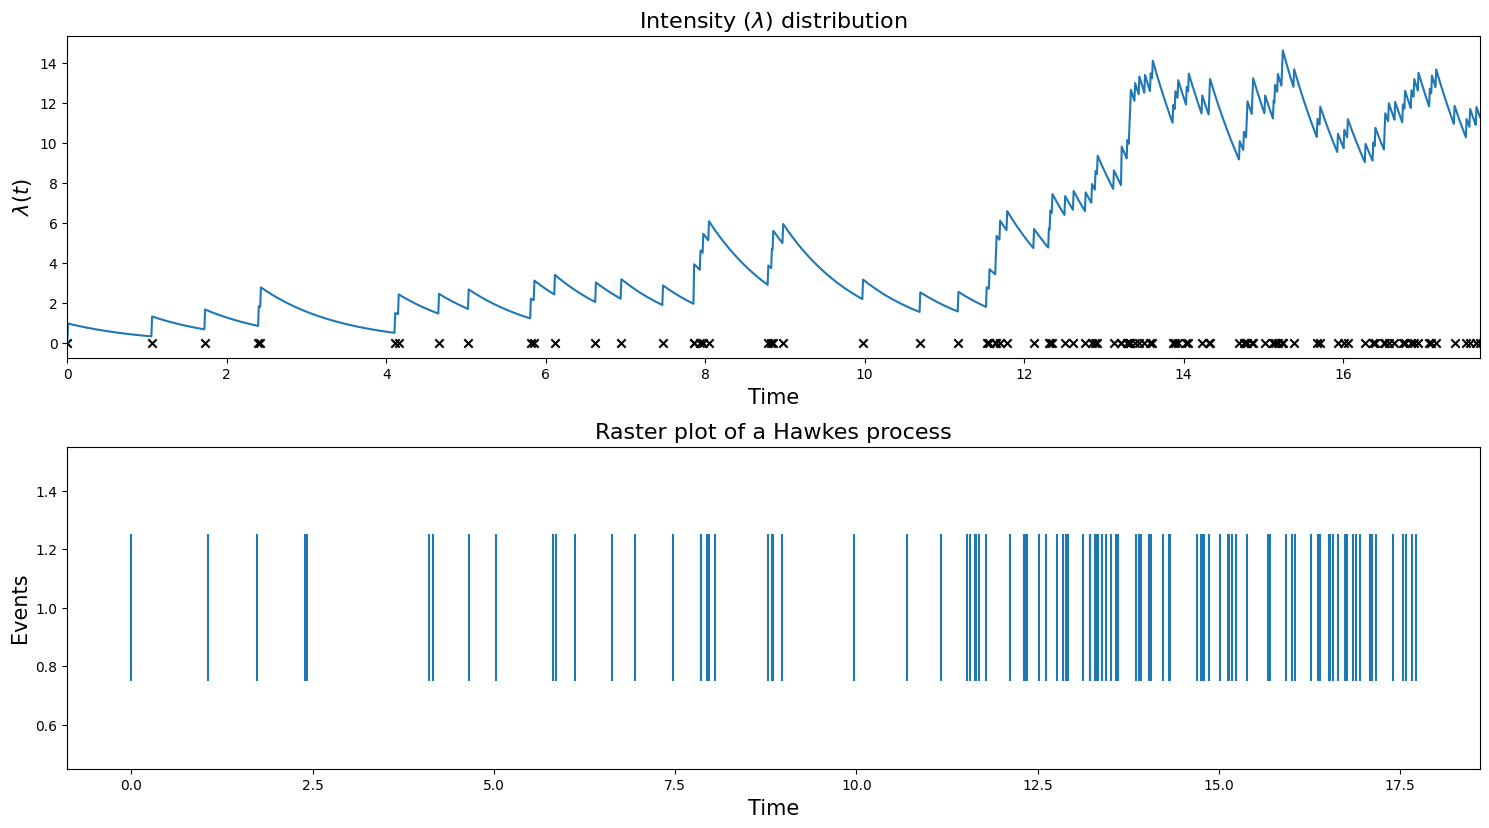

In [3]:
n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
n=1
N = 10**2
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

def intensity(past, t, mu):
    past = np.asarray(past)
    past = past[past < t]
    return mu * np.exp(-mu * (t - past)).sum()


x = np.linspace(0, max(times), 2000)
y = [intensity(times, t, mu) for t in x]

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)


ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(x, y)
ax0.set(xlim=[0,max(times)])

ax0.scatter(times, np.random.random(len(times))*0.01, marker="x", color="black")
ax0.set_title('Intensity $(\lambda)$ distribution', fontsize=16)
ax0.set_xlabel('Time', fontsize=15)
ax0.set_ylabel('$\lambda (t)$', fontsize=15)


ax1 = fig.add_subplot(axgrid[1,0])
ax1.eventplot(times, orientation='horizontal', linelengths=0.5)
ax1.set_xlabel('Time', fontsize=15) 
ax1.set_ylabel('Events', fontsize=15)
ax1.set_title('Raster plot of a Hawkes process', fontsize=16)

plt.tight_layout()
plt.show()


In [4]:
n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
N = 10**6
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(times, rate, marker = 'o', ms=0.5 ,drawstyle = 'steps')
ax0.set_title('Distribución de intensidad $\lambda$')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('$\lambda (t)$')

ax1 = fig.add_subplot(axgrid[2,0])
x = np.arange(0,10,0.001)
y = 1/x**2
ax1.plot(x, y, label = '$y\sim x^{-2}$')
ax1.hist(times_between_events, bins='auto', density=True, log=True, alpha=0.5, color='blue', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Hawkes process para N={n_events[-1]} eventos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

ax2 = fig.add_subplot(axgrid[1,0])
ax2.plot(times, n_events, marker = 'o', ms=0.5 , drawstyle = 'steps-post')
ax2.set_title('Distribución de eventos')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Eventos')


fig.tight_layout()
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_14704\3715703562.py:25: RuntimeWarning: divide by zero encountered in divide
  y = 1/x**2


In [ ]:
n = 1
mus = np.arange(0.2, 1.2, 0.2)
plt.figure(figsize=(15, 6))
for mu in mus:
    n_events = [0]
    times_between_events = [0]
    rate = [mu]
    for i in range(N): 
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
        n_events.append(i + 1)
    times = np.cumsum(times_between_events)
    plt.plot(times, rate, marker = 'o', ms=0.5 , drawstyle = 'steps', label = f'$\mu={mu:.2f}$')


plt.xlabel('Tiempo')
plt.ylabel('$\lambda (t)$')
plt.title('Distribución de intensidad $\lambda$')
plt.legend()
plt.tight_layout()
plt.show()


# Percolation Strength $P_{\infty}$ plots

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ...  True False False]
[ True False False ...  True False False]
[ True False False ...  True  True  True]
[ True False  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


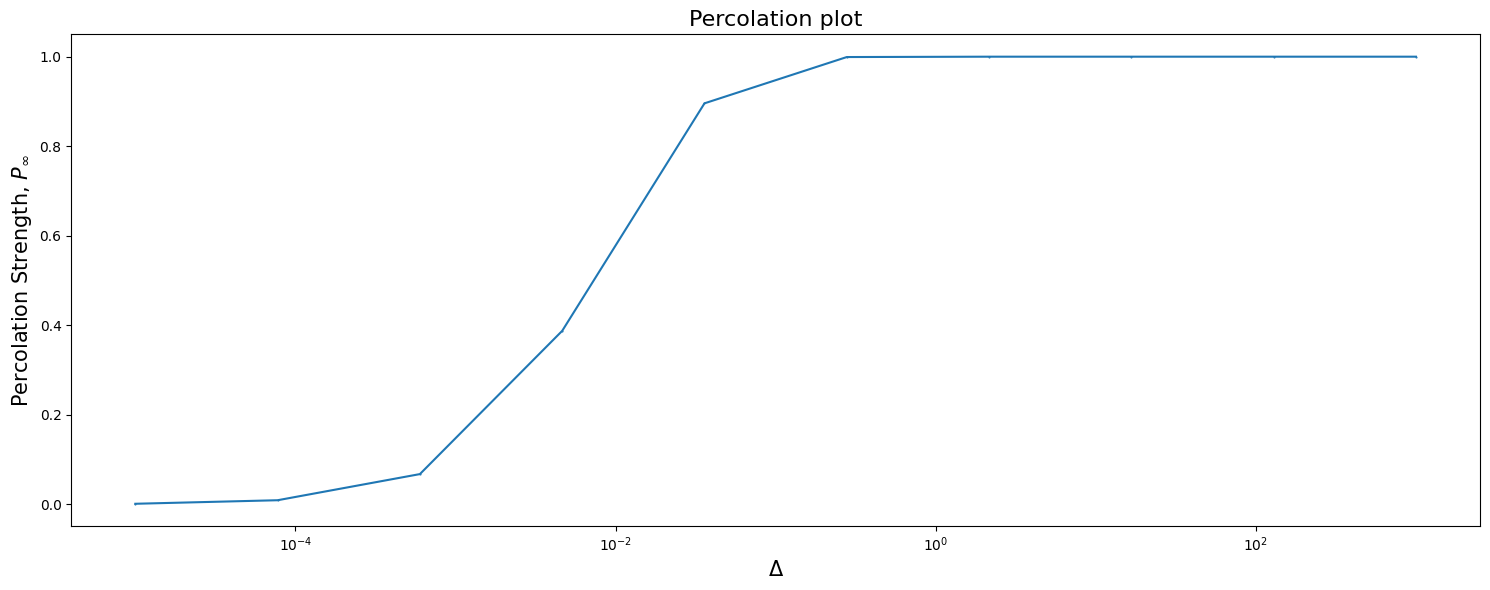

In [ ]:
# Generate temporal series
N = 10**4
n = 1
mu = 1
n_events = np.arange(0, N+1)
times_between_events = [0]
rate = [mu]
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
times = np.cumsum(times_between_events)

percolations =[]
deltas =np.logspace(-5, 3, num=10, base=10)

for delta in deltas:
    percolations.append(np.sum((times_between_events) < delta)/N)
    print((times_between_events) < delta)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations, marker = 'o', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot', fontsize=16)
plt.tight_layout()
plt.show()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

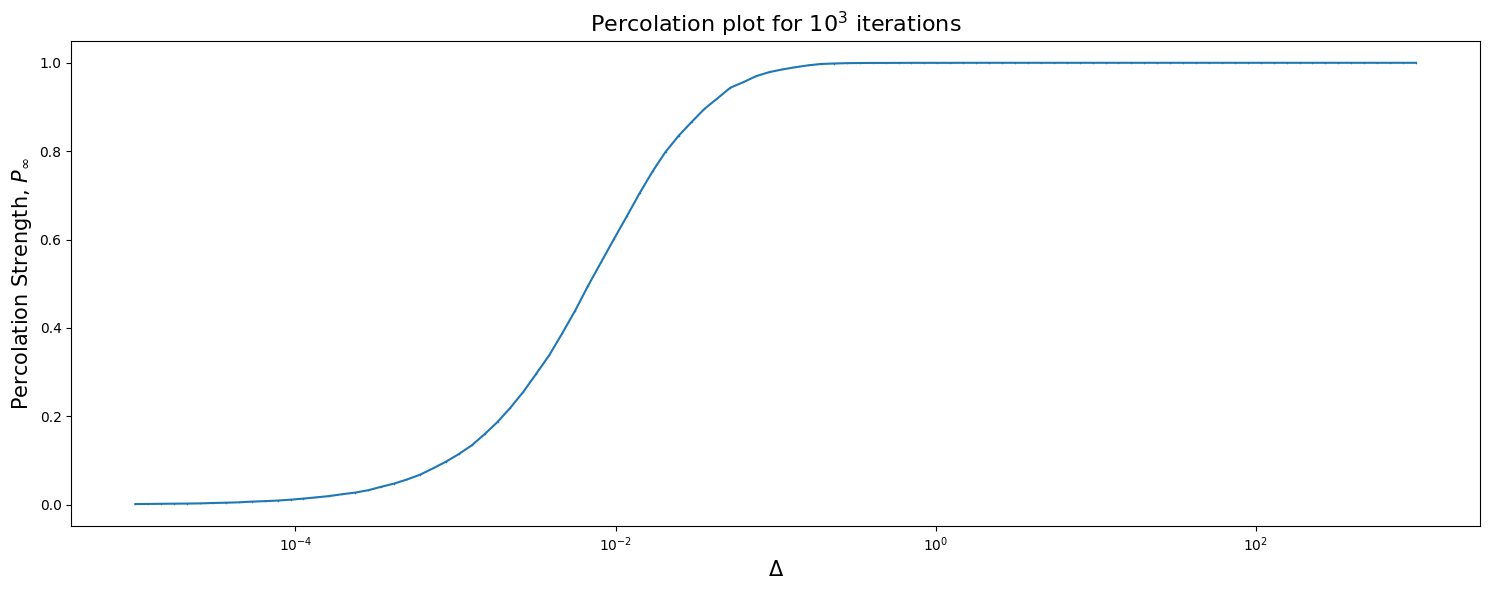

In [ ]:
deltas =np.logspace(-5, 3, num=100, base=10)
percolations_means = []
percolation_strength_list = []
n_iters = 1000

for _ in range(n_iters):
    percolations = []
    for delta in deltas:
        percolations.append(np.sum((times_between_events) < delta)/N)
    percolation_strength_list.append(percolations)
    print(_)
percolations_means = np.mean(percolation_strength_list, axis=0)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations_means, marker = 'x', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot for $10^3$ iterations', fontsize=16)
plt.tight_layout()
plt.show()

Número de clusters:  933
Número de clusters:  933
Número de clusters:  934
Número de clusters:  934
Número de clusters:  936
Número de clusters:  936
Número de clusters:  939
Número de clusters:  939
Número de clusters:  939
Número de clusters:  941
Número de clusters:  942
Número de clusters:  945
Número de clusters:  946
Número de clusters:  946
Número de clusters:  948
Número de clusters:  948
Número de clusters:  950
Número de clusters:  952
Número de clusters:  952
Número de clusters:  953
Número de clusters:  955
Número de clusters:  955
Número de clusters:  955
Número de clusters:  957
Número de clusters:  958
Número de clusters:  958
Número de clusters:  959
Número de clusters:  959
Número de clusters:  960
Número de clusters:  961
Número de clusters:  961
Número de clusters:  962
Número de clusters:  962
Número de clusters:  962
Número de clusters:  963
Número de clusters:  963
Número de clusters:  964
Número de clusters:  964
Número de clusters:  965
Número de clusters:  965


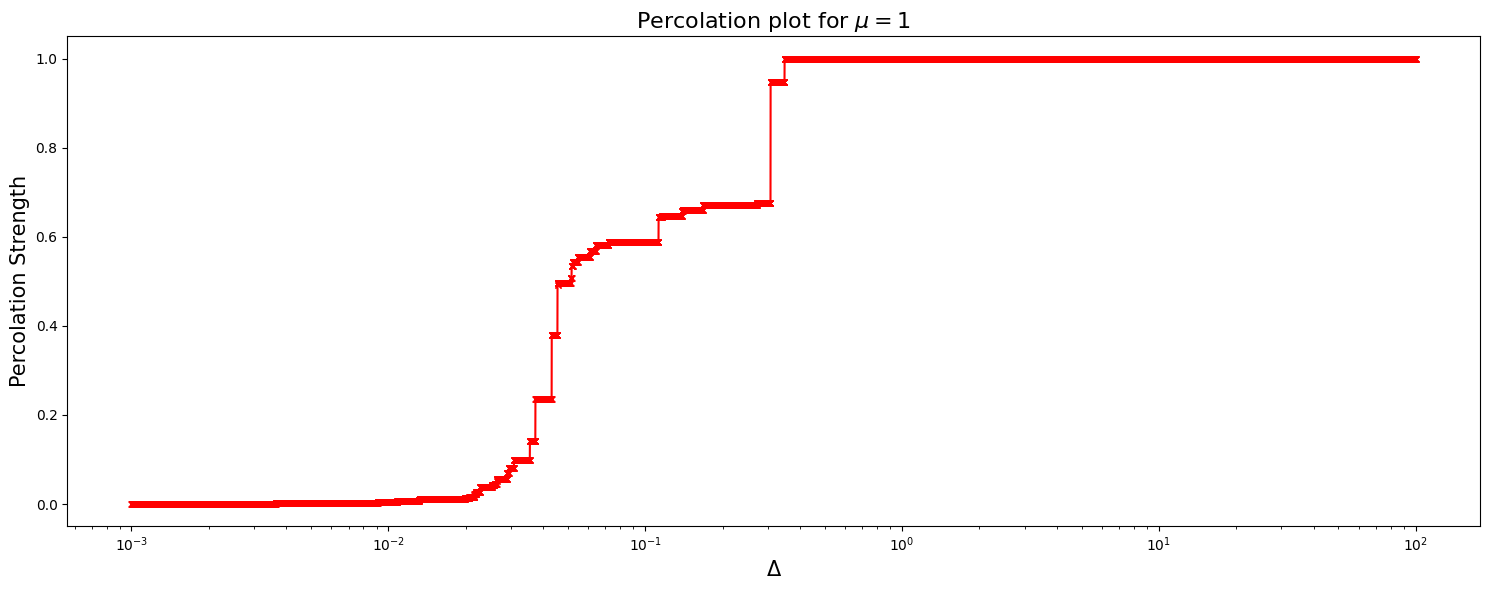

In [ ]:
def calculate_percolation_strength(times_between_events, deltas):
    percolation_strengths = []

    for delta in deltas:
        cluster_sizes = []
        # Initialize the size of the current cluster
        current_cluster_size = 0

        for i in range(len(times_between_events)):
            if times_between_events[i] <= delta:
                current_cluster_size += 1
            else:
                if current_cluster_size > 0:
                    cluster_sizes.append(current_cluster_size)
                # Reset the size of the current cluster
                current_cluster_size = 0

        # Add the size of the last cluster
        if current_cluster_size > 0:
            cluster_sizes.append(current_cluster_size)

        max_cluster_size = max(cluster_sizes) 

        percolation_strengths.append(max_cluster_size / len(times_between_events))
        print('Número de clusters: ', len(cluster_sizes))
    return percolation_strengths


# Definir los valores de delta
deltas = np.logspace(-3, 2, num=1000, base=10)

# Calcular la fuerza de percolación
percolation_strengths = calculate_percolation_strength(times_between_events, deltas)

# Graficar la fuerza de percolación en función de delta
plt.figure(figsize=(15, 6))
plt.plot(deltas, percolation_strengths, color='red', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu}', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
percolation_strengths_list = []
n_iters = 1000
deltas = np.logspace(-2, 3, num=1000, base=10)
for _ in range(n_iters):
    percolation_strength = calculate_percolation_strength(times, deltas)
    percolation_strengths_list.append(percolation_strength)
    print(f'Iteration {_} done')
mean_percolation_strengths = np.mean(percolation_strengths_list, axis=0)


plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths, color = 'purple', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu} for $K=${n_iters} iterations', fontsize=16)
plt.tight_layout()
plt.show()

: 

Modificar el +-1 en el current cluster size en mi algoritmo


Añadir un bucle if para contar el cluster más grande, un cluster empieza en un 0 y acaba en el último 1, los 0 identifican el comienzo de un cluster, puedo fijarme donde están y con np.where ver donde están para después restar y obtener el tamaño del cluster.

Mirar algo de la primera parte de la parte 1 del libro, anotar cosas importantes.

Intentar representar las otras gráficas de la probabilidad. Lo de los clusters es realizar las series varias (con el mismo número de eventos) veces hasta que el tamaños de los vectores como cluster sizes llegue a 10^6